# <span style="color:lightblue"> Lecture 10: Subsetting Data </span>

<font size = "5">

In the previous lecture we ...

- Worked through the definition of functions
- Illustrated some examples

In this lecture, we will ...

- Discuss the syntax of functions (local/global)
- Apply functions to multiple elements in a data frame
- Introduce ".py" files

## <span style="color:lightblue"> I. Import Libraries and Read Files</span>

In [ ]:
# the "pandas" library is for manipualting datasets
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the car features dataset
carfeatures = pd.read_csv("data_raw/features.csv")

## <span style="color:lightblue"> II. Basic data display </span>

<font size = "5">

<font size = "5">

Display a dataset

- Remember that in VS-Code there is also a data viewer.
- Go to the variables tab at the top of the notebook

In [ ]:
# The display() command will show the first 5 rows and the last five rows

display(carfeatures)

<font size = "5" >

Extract column names

In [ ]:
# Write the name of the dataset and use a period "." to extract 
# the attribute "columns" and the subttribute "values"

car_colnames = carfeatures.columns.values
print(car_colnames)

<font size = "5">

Subset columns:

```python
data[list_names]
```

In [ ]:
# To subset multiple columns write the name of the datasets 
# and enter a list in square brackets next to the name

list_subsetcols     = ["weight","mpg"]
subcols_carfeatures = carfeatures[list_subsetcols]
display(subcols_carfeatures)

# Or we can simply include the list directly inside square brackets
display(carfeatures[["weight","mpg"]])


<font size = "5">

Try it yourself!

- Extract the weight and acceleration variables

In [ ]:
# Write your own code

display(carfeatures[["weight","acceleration"]])



## <span style="color:lightblue"> III. Subsetting by row/column position </span>

<font size = "5">

<font size = "5">

Sort by column

In [ ]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
display(carsorted)


<font size = "5">

Subset row(s)

``` data.iloc[ row_int , : ]``` $\quad$ or

``` data.iloc[ list_rows, : ]```


In [ ]:
# The following command extracts all columns for row zero
# Remember that numbering starts at zero in Python
# In this case we will show the car with the highest "mpg" value

display(carsorted.iloc[0,:])
display(carsorted.iloc[[0,1,2],:])


<font size = "5">

Subset block of rows

``` data.iloc[ lower:upper , : ]```

In [ ]:
# Extract rows 0 to 5
display(carfeatures.iloc[0:5,:])

# Extract rows 8 onwards
display(carfeatures.iloc[ 8:, : ])

# Note: We can leave the numbers to the left and right of ":" blank
# in order to select all values before or after, respectively.


<font size = "5">

Similar for columns

- One column: $\quad$    ``` data.iloc[ : , col_integer ]```
- Multiple columns: $\quad$   ``` data.iloc[ : , list_cols ]```
- Row+Column: $\quad$ ``` data.iloc[ list_rows , list_cols ]```

<font size = "5">

Try it yourself!!

- Create a new datate called "car_ascendingmpg" which <br>
sorts cars from lowest to highest mpg
- Subset the data of 5 cars with the lowest "mpg"

HINT: Use ``sort_values(...,ascending = TRUE``)


In [ ]:
# Write your own code

car_ascendingmpg = carfeatures.sort_values(by = "mpg", ascending = True)
display(car_ascendingmpg.iloc[ 0:5 ,])



## <span style="color:lightblue"> II. Queries </span>

<font size = "5">
Filter the data based on its content <br>

```python
data.query("logical expression")
```

<font size = "5">

(i) Expressions with colnames

In [ ]:
# Enter any logical expression

data_threshold_mpg  = carfeatures.query("mpg >= 25")
data_rangeweight    = carfeatures.query("(acceleration >= 10) & (acceleration < 18)")

display(data_threshold_mpg)

<font size = "5">

(ii) Expressions with colnames + global variables (@)

In [ ]:
# You can invoke global variables into the query by using @variablename
# If you don't include @, then Python will try to look for a column with 
# that name.

threshold = 25
data_varthreshold_mpg = carfeatures.query("mpg >= @threshold")

<font size = "5">

(iii) Expressions with colnames with spaces

In [18]:
# Sometimes column names have spaces in them
# In this case use the "`" symbol, e.g.          `variable name`

carfeatures["new variable"] = carfeatures["mpg"]
data_spacesthreshold_mpg = carfeatures.query("`new variable` >= 25")


<font size = "5">

Try it yourself!

-  Subset the data with mpg $\ge$ 25 and cylinders == 8

In [ ]:
# Write your own code here

data_mpg_cylinders = carfeatures.query("(mpg >= 25) & (cylinders == 8)")

# mpg_threshold = 25
# cylinders_threshold = 8
# data_mpg_cylinders = carfeatures


## <span style="color:lightblue"> III. Visualization for Subsets of the Data </span>


<font size = "5">

List of unique categories

In [ ]:
# Use pd.unique() to extract a list with the unique elements in that column

list_unique_cylinders = pd.unique(carfeatures["cylinders"])
print(list_unique_cylinders)

<font size = "5">

Compute two overlapping plots

In [ ]:
# If we call plt.scatter() twice to display two plots
# To display all plots simultaneously we include plt.show() at the very end.
# The idea is that the graphs are stacked on top of each other

category_value = 8
df_8 = carfeatures.query("cylinders == @category_value")
df_4 = carfeatures.query("cylinders == 4")

plt.scatter(x = df_8["weight"],y = df_8["acceleration"], color = "salmon")
plt.scatter(x = df_4["weight"],y = df_4["acceleration"])
plt.legend(labels = ["8","4"],
           title  = "Cylinders")

plt.show()

# Note: If we put plt.show() in between the plots, then the results will
# be shown on separate graphs instead.


<font size = "5">

Compute plots by all categories

In [ ]:
# Compute number of unique categories
list_unique_cylinders = pd.unique(carfeatures["cylinders"])

# Use a for loop to plot a scatter plot between "weight" and "acceleration"
# for each category. Each plot  will have a different color

for category in list_unique_cylinders:
    df   = carfeatures.query("cylinders == @category")
    plt.scatter(x = df["weight"],y = df["acceleration"])
    
# Add labels and a legends    
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.legend(labels = list_unique_cylinders,
           title  = "Cylinders")
plt.show()


<font size = "5">

Try it yourself!

- Compute a histogram of "mpg" by cylinder count
- Make the histograms transparent by adjusting ```alpha``` in

 ```plt.hist(x = ..., alpha = 0.5)``` 

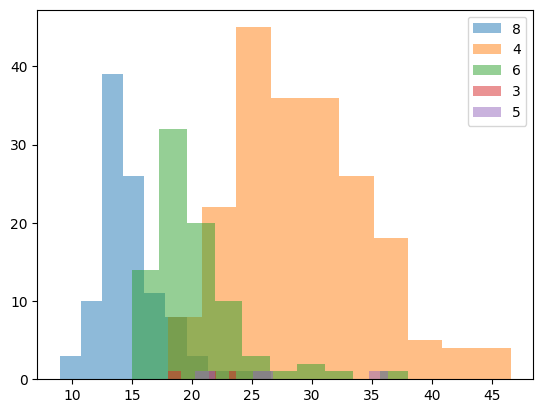

In [19]:
# Write your own code

list_cylinders = pd.unique(carfeatures["cylinders"])

for category_value in list_cylinders:
    dataframe = carfeatures.query("cylinders == @category_value")
    plt.hist(dataframe["mpg"], alpha = 0.5)

plt.legend(labels = list_cylinders)


#??? legend
# mpg inside category_value of cylinders?
#?